# Code to visualise delta mag between stars and TNO

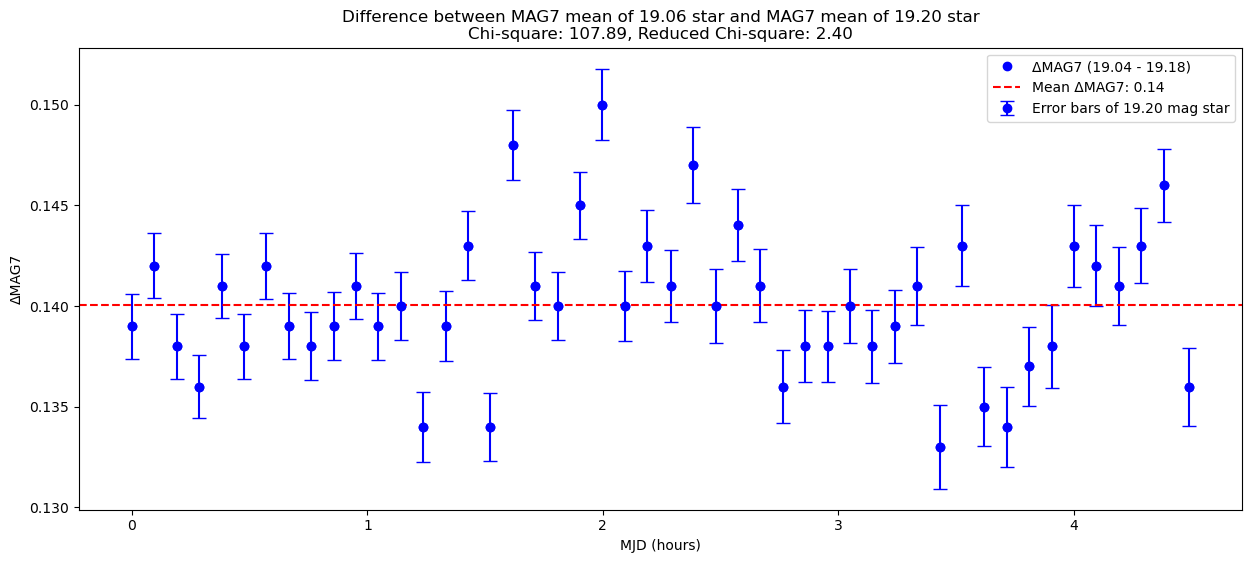

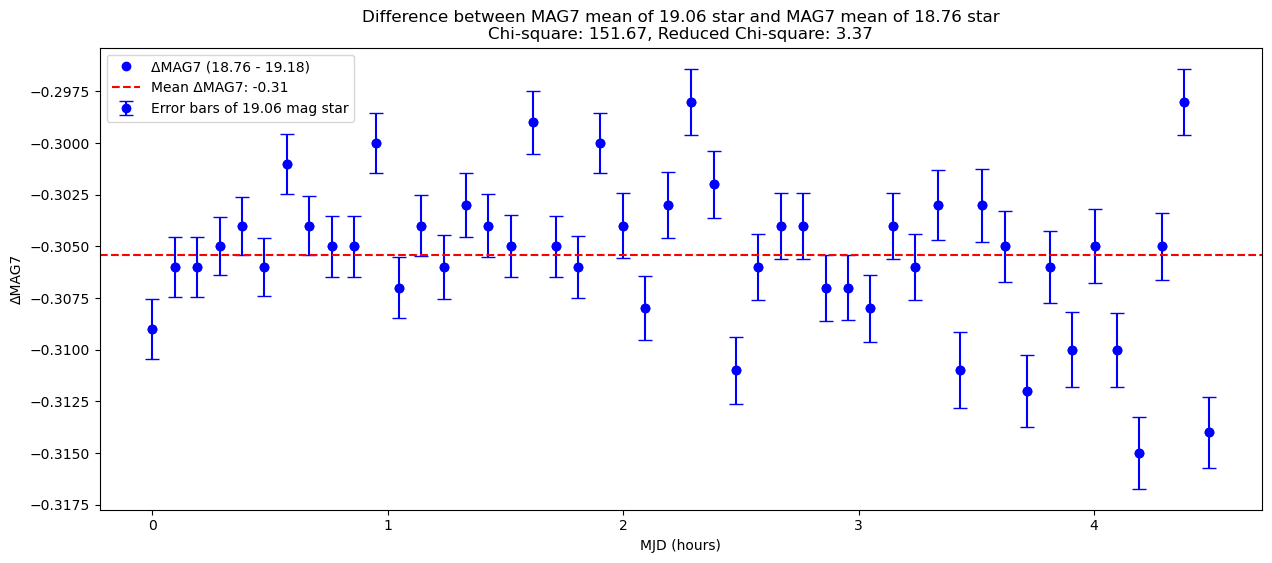

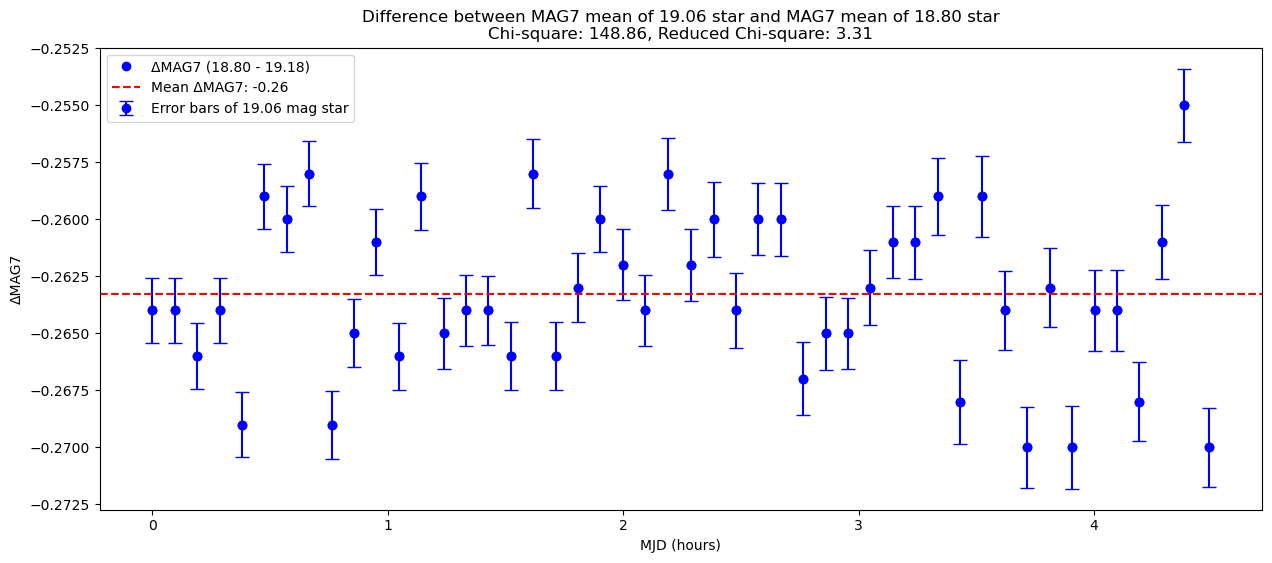

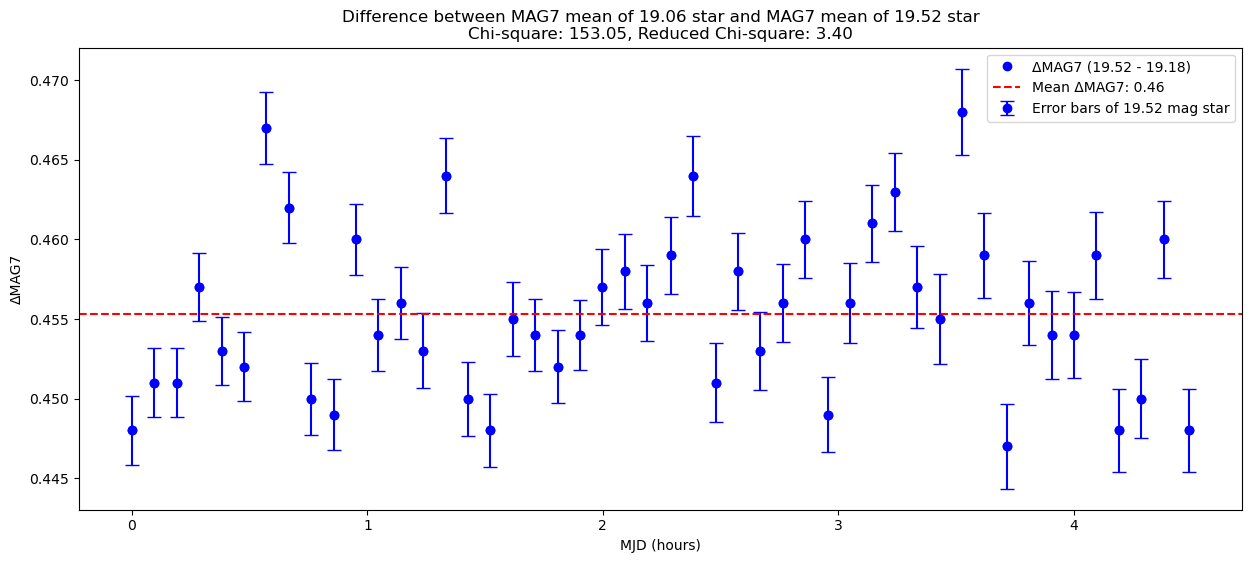

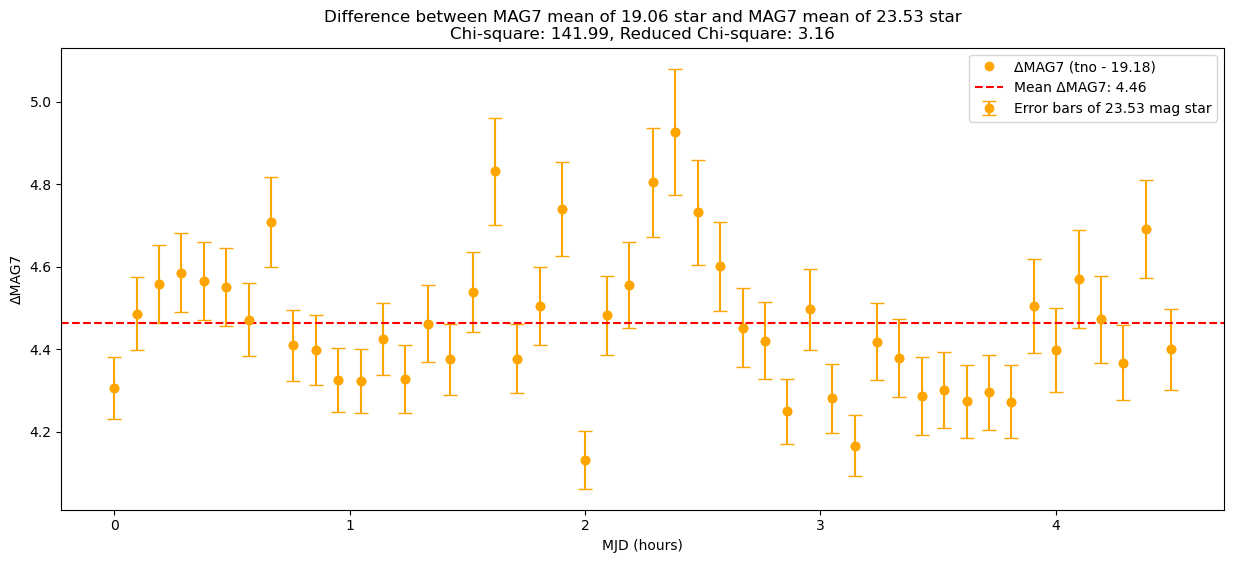

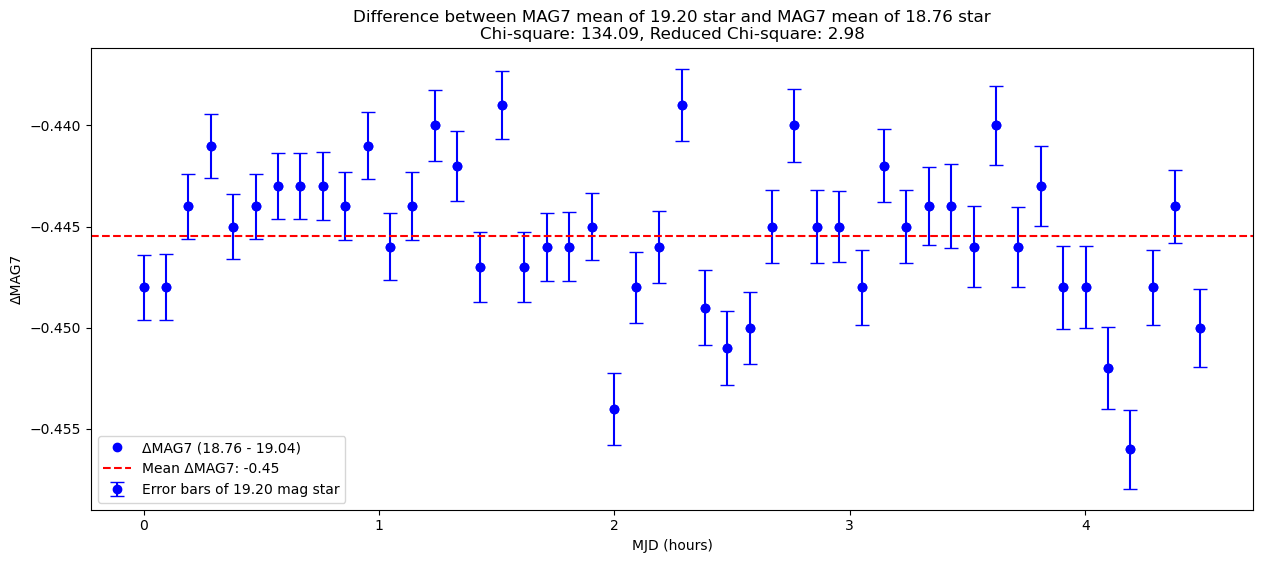

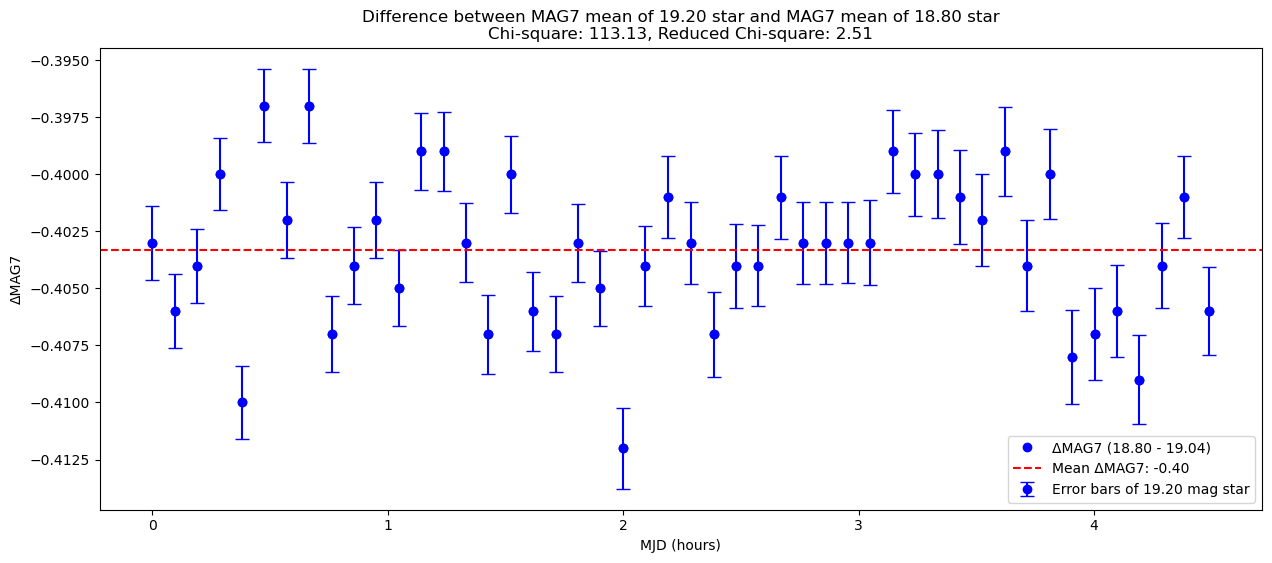

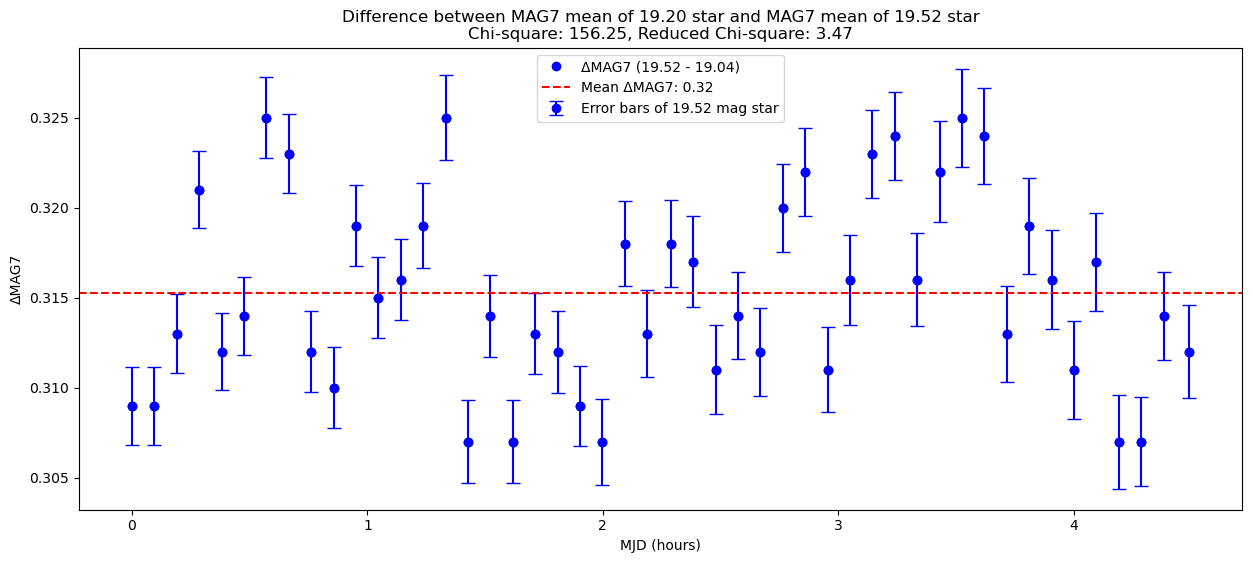

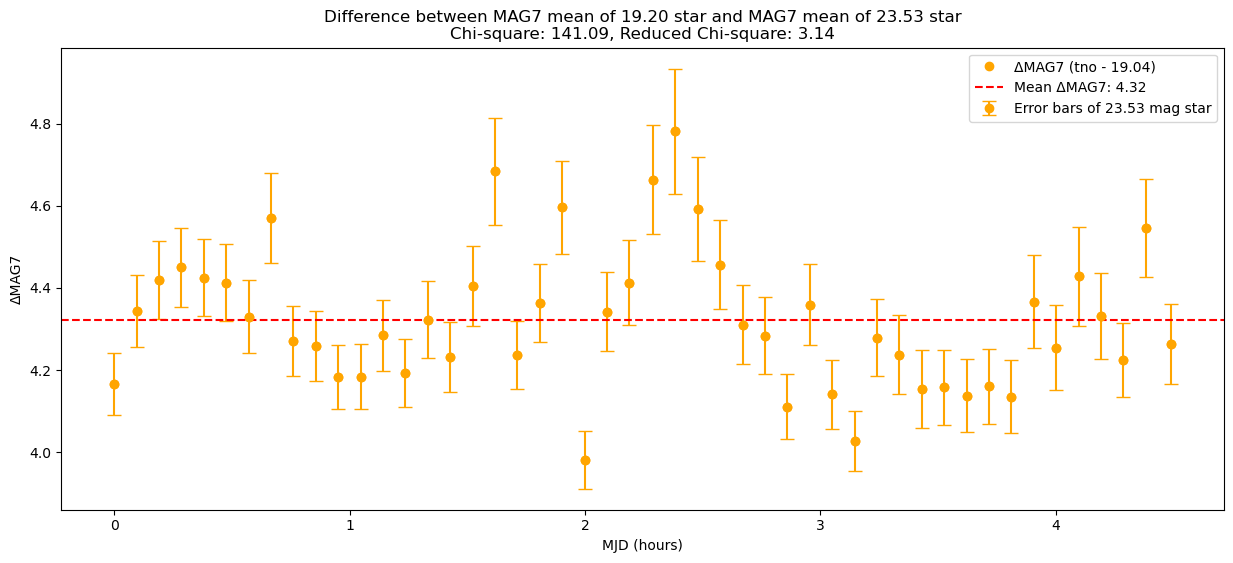

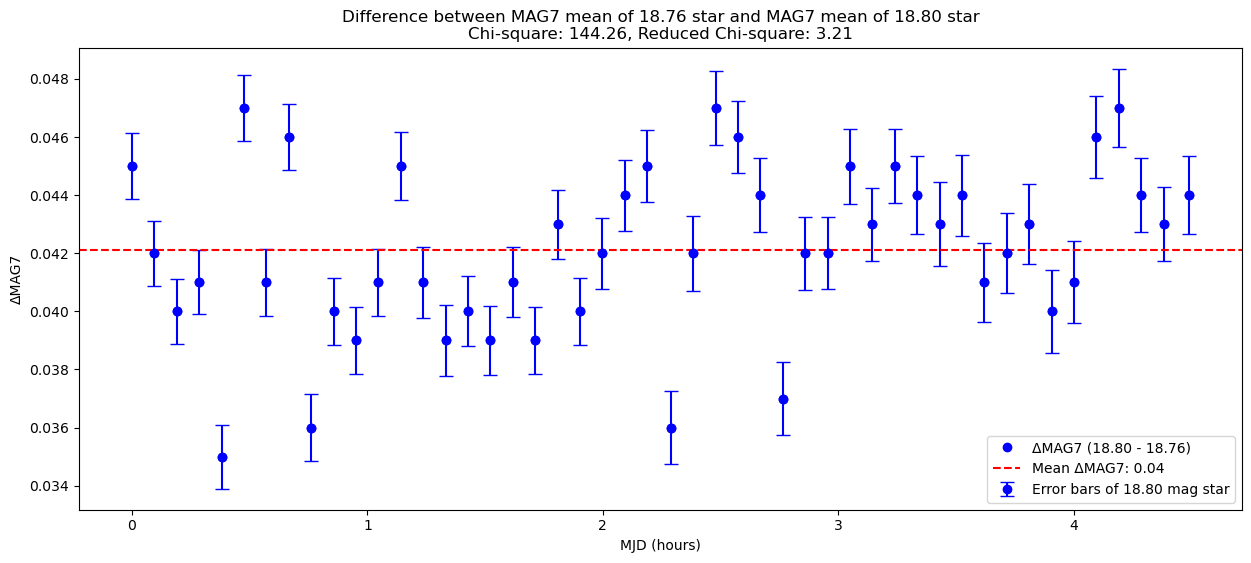

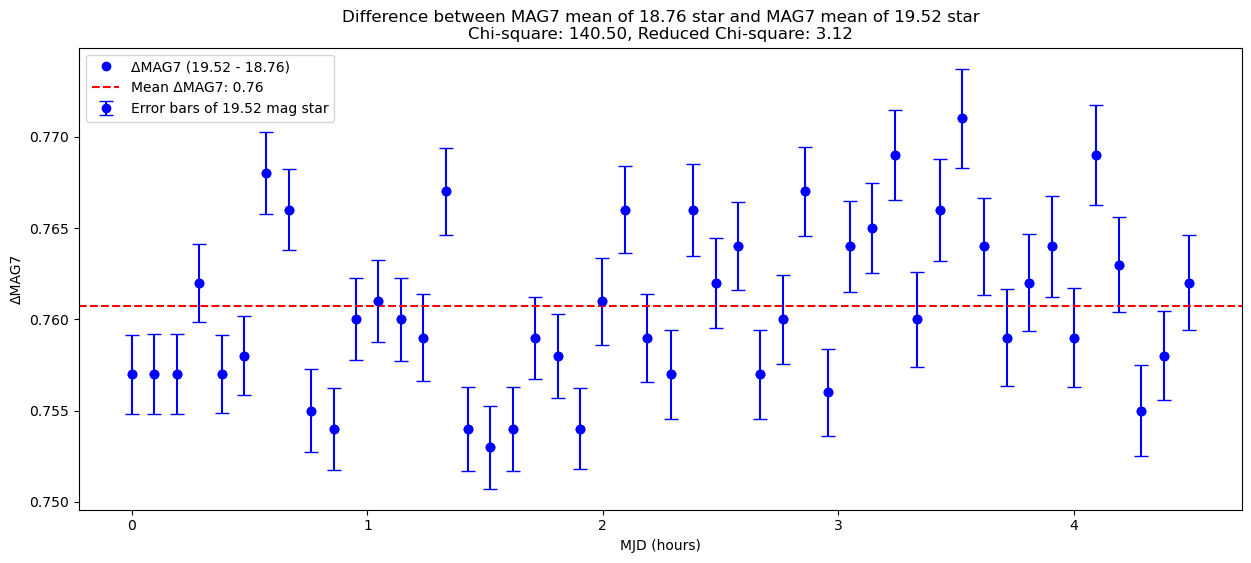

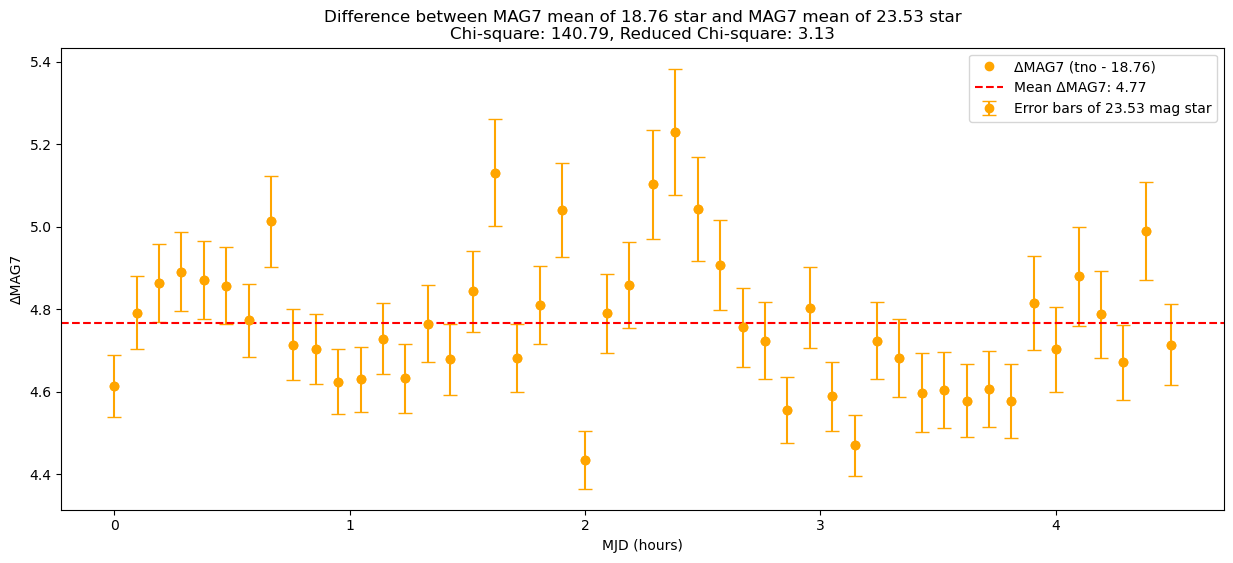

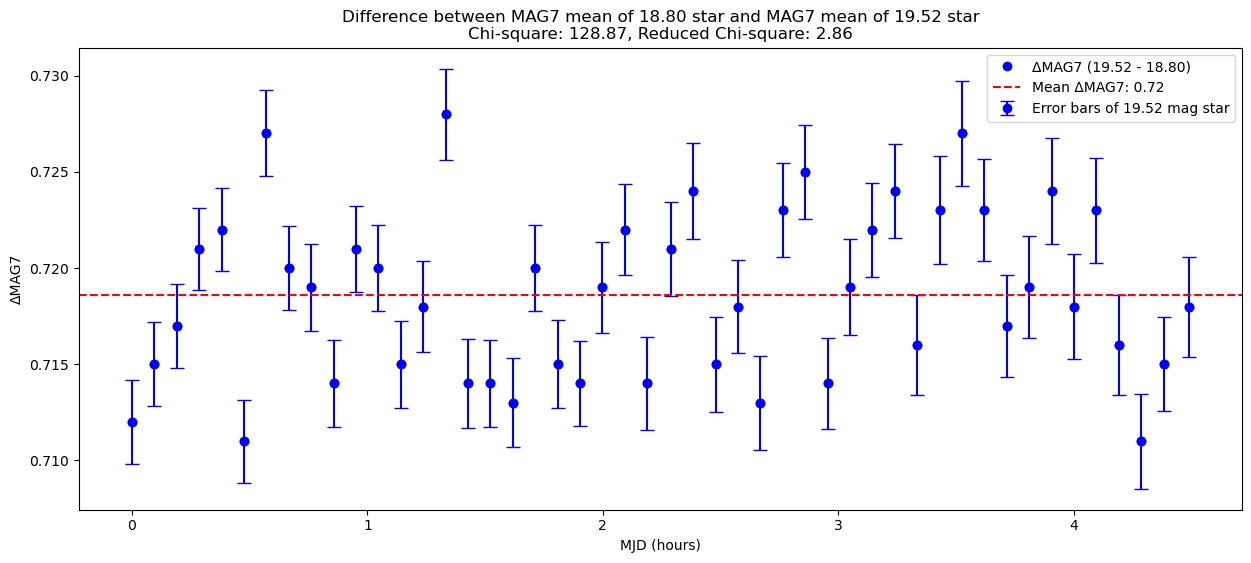

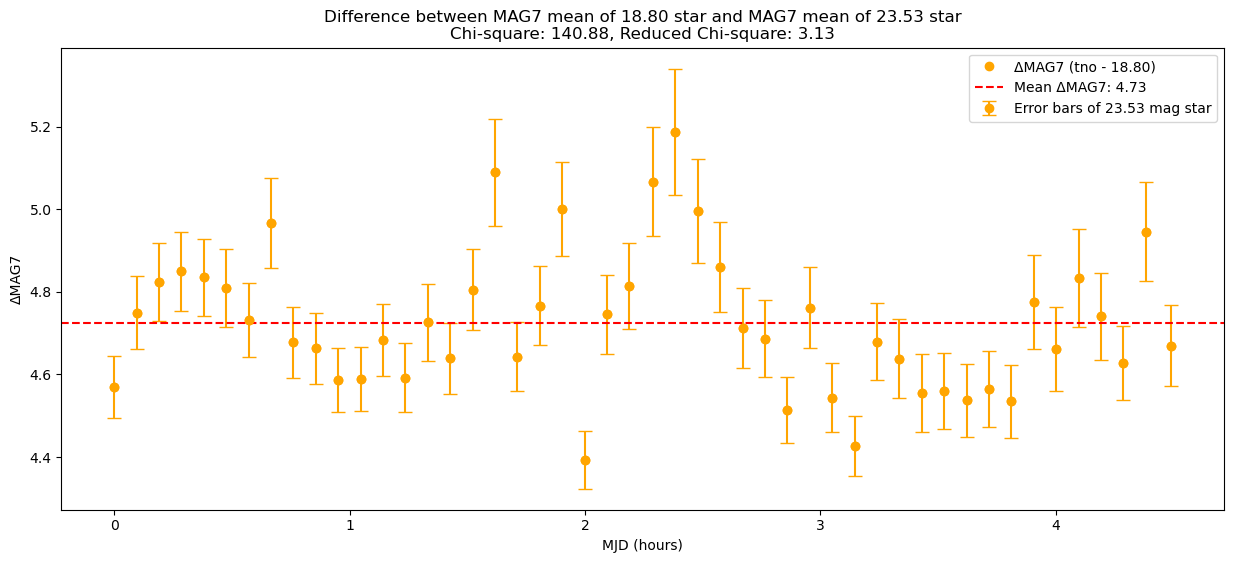

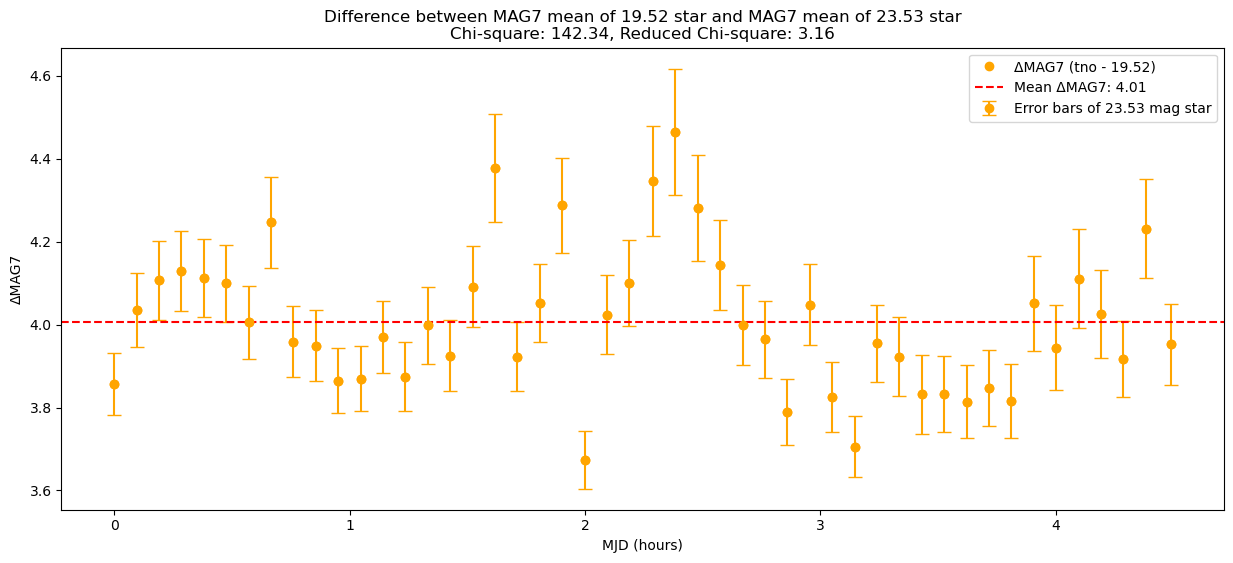

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean


bad_frames = []
# Read data from the six files
data_1 = pd.read_csv('fs1_24.csv', skiprows=bad_frames)
data_2 = pd.read_csv('fs2_24.csv', skiprows=bad_frames)
data_3 = pd.read_csv('fs3_24.csv', skiprows=bad_frames)
data_4 = pd.read_csv('fs4_24.csv', skiprows=bad_frames)
data_5 = pd.read_csv('fs5_24.csv', skiprows=bad_frames)
data_6 = pd.read_csv('tno_24.csv', skiprows=bad_frames)

datasets = [(data_1, '19.18'), (data_2, '19.04'), (data_3, '18.76'), (data_4, '18.80'), (data_5, '19.52'), (data_6, 'tno')]

for i, (data_i, label_i) in enumerate(datasets):
    mag_i_mean = data_i['MAG7'].mean()
    for j, (data_j, label_j) in enumerate(datasets[i+1:], start=i+1):
        mag_i = data_i['MAG7']
        mjd_i = (data_i['MJDATE'] - data_i['MJDATE'].iloc[0]) * 24
        merr_i = data_i['MAGUNCERT7']
        mean_i = mean(mag_i)

        mag_j = data_j['MAG7']
        mjd_j = (data_j['MJDATE'] - data_j['MJDATE'].iloc[0]) * 24
        merr_j = data_j['MAGUNCERT7']
        mean_j = mean(mag_j)

        delta_mag_ij = mag_j - mag_i
        
        mean_delta_mag_ij = delta_mag_ij.mean()
        
        err_delta = np.sqrt((merr_i**2) + (merr_j**2))
        
        # Determine which error bars to use based on which magnitude is larger
        max_mag = max(np.max(mag_i), np.max(mag_j))
        if np.max(mag_i) == max_mag:
            error_bars = merr_i
        else:
            error_bars = merr_j

        fit_ij = np.polyfit(mjd_j, delta_mag_ij, 2)
        poly_func_ij = np.poly1d(fit_ij)

        # Calculate residuals
        residuals = (delta_mag_ij - mean_delta_mag_ij) / err_delta

        # Calculate chi-square
        chi_square = np.sum(residuals ** 2)

        # Calculate degrees of freedom
        dof = len(delta_mag_ij) - len(fit_ij)

        # Calculate reduced chi-square
        reduced_chi_square = chi_square / dof

        plt.figure(figsize=(15, 6))
        
        # Set color based on whether data_5 is involved
        plot_color = 'orange' if 'tno' in [label_i, label_j] else 'blue'

        # Plot the difference between MAG35 of j and MAG35 of i
        plt.plot(mjd_j, delta_mag_ij, 'o', label=f'ΔMAG7 ({label_j} - {label_i})', color=plot_color)
        plt.errorbar(mjd_j, delta_mag_ij, yerr=error_bars, fmt='o', capsize=5,
                     color=plot_color,
                     label=f'Error bars of {mean_i:.2f} mag star' if np.max(mag_i) == max_mag else f'Error bars of {mean_j:.2f} mag star')
        plt.axhline(y=mean_delta_mag_ij, color='r', linestyle='--', label=f'Mean ΔMAG7: {mean_delta_mag_ij:.2f}')
        # plt.plot(mjd_j, poly_func_ij(mjd_j), 'b--', label='Polyfit Curve')
        plt.xlabel('MJD (hours)')
        plt.ylabel('ΔMAG7')
        plt.title(f'Difference between MAG7 mean of {mean_i:.2f} star and MAG7 mean of {mean_j:.2f} star\nChi-square: {chi_square:.2f}, Reduced Chi-square: {reduced_chi_square:.2f}')
        plt.legend()
        plt.show()


# Code to save delta mag between stars and TNO

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean


bad_frames = []
# Read data from the six files
data_1 = pd.read_csv('fs1_24.csv', skiprows=bad_frames)
data_2 = pd.read_csv('fs2_24.csv', skiprows=bad_frames)
data_3 = pd.read_csv('fs3_24.csv', skiprows=bad_frames)
data_4 = pd.read_csv('fs4_24.csv', skiprows=bad_frames)
data_5 = pd.read_csv('fs5_24.csv', skiprows=bad_frames)
data_6 = pd.read_csv('tno_24.csv', skiprows=bad_frames)

datasets = [(data_1, '19.18'), (data_2, '19.04'), (data_3, '18.76'), (data_4, '18.80'), (data_5, '19.52'), (data_6, 'tno')]

# Create a DataFrame to store the results
results = pd.DataFrame()

# Initialize MJDATE column
results['MJDATE'] = data_1['MJDATE']

# Calculate delta magnitudes of data1,3,4,5 subtracted from data_2 (19.04)
reference_data = data_2['MAG7']
reference_mjdate = data_2['MJDATE']

for i, (data_i, label_i) in enumerate(datasets):
    if label_i != '19.04':
        results[f'delta_mag_{label_i}-19.04'] = reference_data.values - data_i['MAG7'].values

# Calculate delta magnitudes of data_6 subtracted from data1,2,3,4,5
reference_data_tno = data_6['MAG7']

for i, (data_i, label_i) in enumerate(datasets[:-1]):  # Exclude the last one (tno) as it's the reference here
    results[f'delta_mag_tno-{label_i}'] = reference_data_tno.values - data_i['MAG7'].values

# Save the results to a CSV file
results.to_csv('delta_mag_results_24.csv', index=False)

print('Results saved to delta_mag_results_24.csv')


Results saved to delta_mag_results_24.csv
